In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

curveballs = pd.read_csv('savant_data.csv')

# General goal and idea for this dataset is to see how effective curveballs are at making batters miss. 

In [2]:
curveballs.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,203,450203,"Morton, Charlie",1271,16.0,0.224,0.194,0.328,0.418,0.270,...,0,-0.5,6.16,110,151,124,147,301,331,303
1,196,448179,"Hill, Rich",976,20.1,0.265,0.176,0.276,0.441,0.302,...,0,-1.1,6.05,106,153,119,148,288,325,291
2,191,657140,"Wright, Kyle",1282,14.9,0.250,0.060,0.357,0.310,0.241,...,0,-0.1,6.46,112,152,122,149,305,332,299
3,188,664285,"Valdez, Framber",1325,14.2,0.172,0.065,0.278,0.237,0.177,...,0,-0.9,6.02,110,154,118,148,295,322,288
4,184,605400,"Nola, Aaron",1341,13.7,0.194,0.204,0.269,0.398,0.251,...,0,0.4,6.85,109,151,128,142,296,323,293


In [3]:
curveballs.tail()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
364,1,669854,"Blanco, Ronel",120,0.8,NaN,NaN,NaN,NaN,NaN,...,0,0.2,6.6,124,148,128,153,292,297,296
365,1,658648,"Avila, Pedro",70,1.4,0.0,0.0,0.0,0.0,0.0,...,0,-0.8,6.4,113,163,126,147,301,322,303
366,1,663765,"Woodford, Jake",293,0.3,0.0,0.0,0.0,0.0,0.0,...,0,-0.5,6.5,115,156,122,151,314,337,315
367,1,663531,"Allen, Logan",164,0.6,NaN,NaN,NaN,NaN,NaN,...,0,-0.9,5.9,87,152,114,138,315,323,300
368,1,645261,"Alcantara, Sandy",1426,0.1,0.0,0.0,0.0,0.0,0.0,...,0,-0.2,6.1,117,151,135,156,305,329,310


<AxesSubplot:>

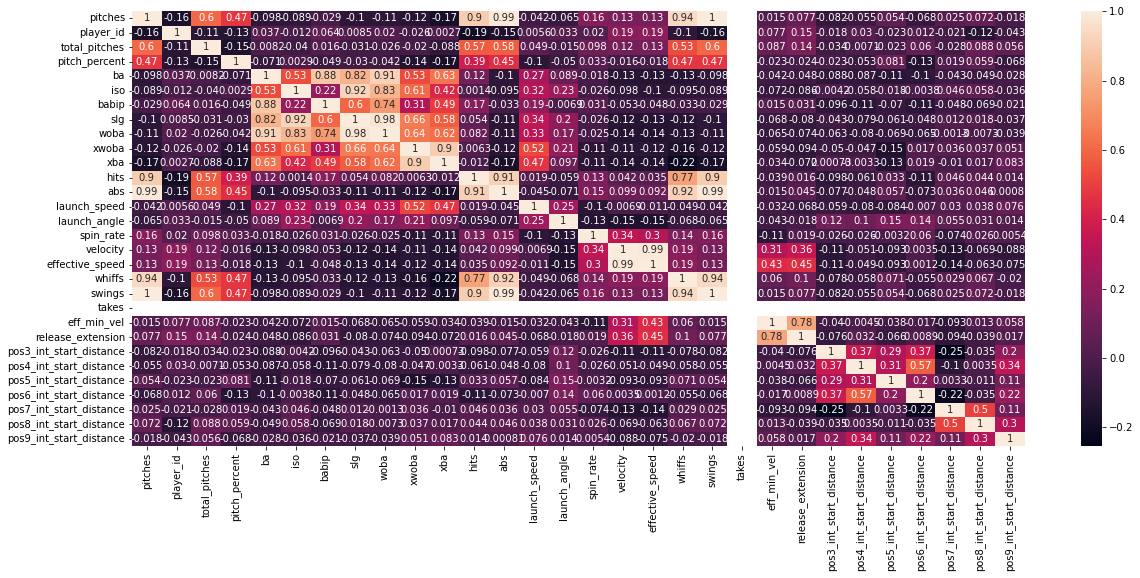

In [4]:
#Looking for general correlation with the data

plt.figure(figsize = (20,8))
sns.heatmap(curveballs.corr(), annot=True)

# Data cleaning

In [5]:
#with so many columns and not all of them being important to what we're looking for, I'm going to drop most of them.
#For the purpose of this analysis, the only pitches represented in this dataset are curveball pitches.

curveballs_clean = curveballs.drop(columns=['ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba', 'abs', 'launch_speed', 'launch_angle', 'spin_rate', 'velocity', 'effective_speed', 'eff_min_vel', 'release_extension', 'pos3_int_start_distance', 'pos4_int_start_distance', 'pos5_int_start_distance', 'pos6_int_start_distance', 'pos7_int_start_distance', 'pos8_int_start_distance', 'pos9_int_start_distance'])

In [6]:
curveballs_clean.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
0,203,450203,"Morton, Charlie",1271,16.0,22.0,81,203,0
1,196,448179,"Hill, Rich",976,20.1,27.0,32,196,0
2,191,657140,"Wright, Kyle",1282,14.9,25.0,65,191,0
3,188,664285,"Valdez, Framber",1325,14.2,16.0,67,188,0
4,184,605400,"Nola, Aaron",1341,13.7,18.0,74,184,0


# Behold! A solid, basic analysis of most of the cleaned data.

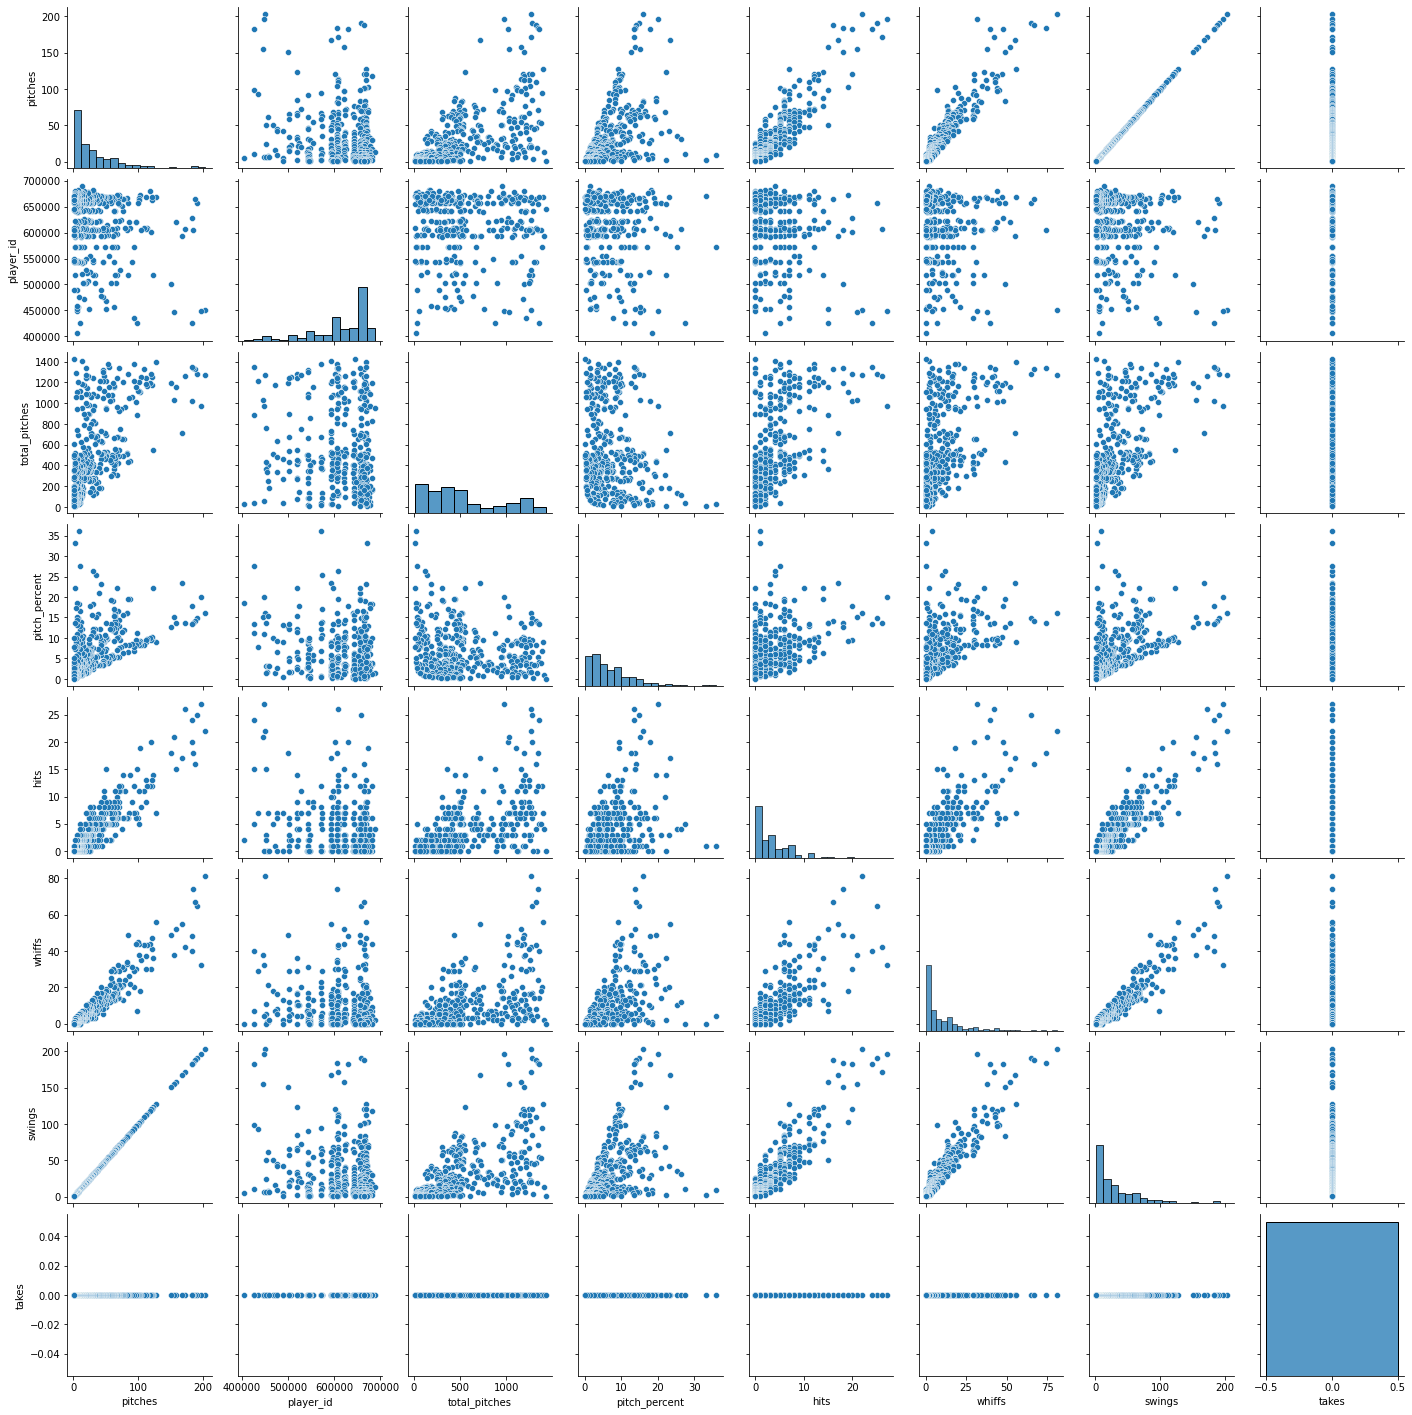

In [7]:
sns.pairplot(curveballs_clean)

<AxesSubplot:>

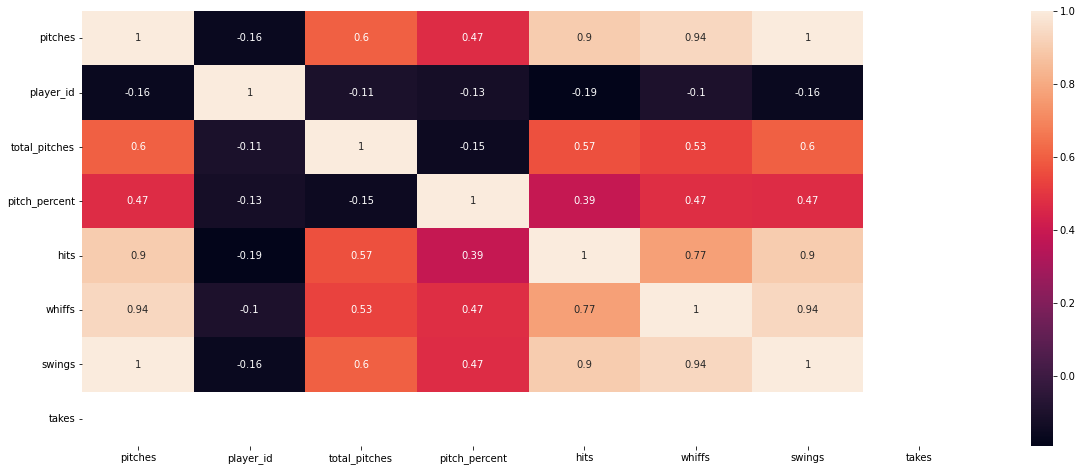

In [8]:
#I know the heatmap earlier had the same information here, but with so many columns dropped I wanted to run it again.

plt.figure(figsize = (20,8))
sns.heatmap(curveballs_clean.corr(), annot=True)

# Visualizations for Curveball Efficiency

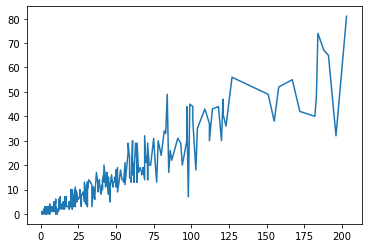

In [9]:
#I love heatmaps. So much so that I could put it on a shirt. But clearly, I do not need this here.
#The correlations are not the reason I'm doing this. That would be more for an ML approach. 
#Which means, it's time to poke around at decent visualizations for this. 

plt.plot('pitches', 'whiffs', data=curveballs_clean)
plt.show()

In [10]:
import squarify

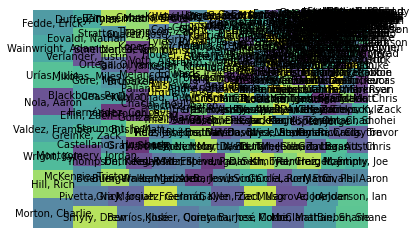

In [11]:
squarify.plot(sizes=curveballs_clean['pitches'], label=curveballs_clean['player_name'], alpha=.8 )
plt.axis('off')
plt.show()

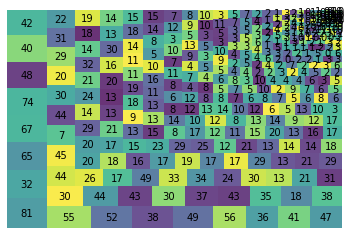

In [12]:
#oh god that was a horrible idea, let's try that again...

squarify.plot(sizes=curveballs_clean['pitches'], label=curveballs_clean['whiffs'], alpha=.8 )
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='pitches', ylabel='whiffs'>

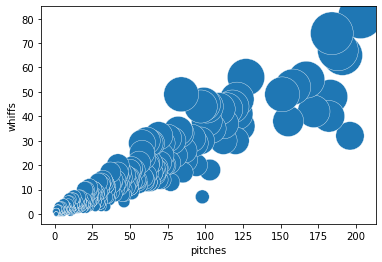

In [13]:
#That's a little better, but it's clear I need to find a better way to visualize this... 
#Bubble plot time?


sns.scatterplot(data=curveballs_clean, x="pitches", y="whiffs", size="whiffs", legend=False, sizes=(20, 2000))

# BEHOLD. It's still sort of overplotting but I'm on the right track. 

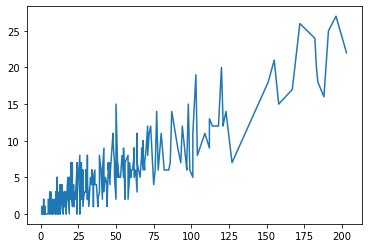

In [14]:
#I keep trying to remember and find ways to show the efficiency of curveballs. It might help to show more than just whiffs.

plt.plot('pitches', 'hits', data=curveballs_clean)
plt.show()

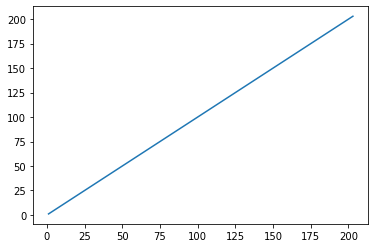

In [15]:
plt.plot('pitches', 'swings', data=curveballs_clean)
plt.show()

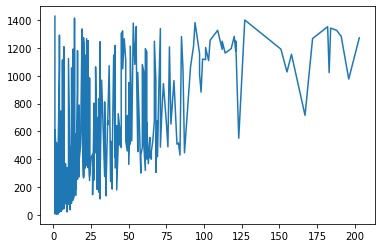

In [16]:
#I'm facepalming over here. I should have known better than to do that, I guess.

plt.plot('pitches', 'total_pitches', data=curveballs_clean)
plt.show()

# Importing Fastball data for a comparison

In [17]:
fastballs = pd.read_csv('Fastball_Data.csv')
fastballs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pitches                  640 non-null    int64  
 1   player_id                640 non-null    int64  
 2   player_name              640 non-null    object 
 3   total_pitches            640 non-null    int64  
 4   pitch_percent            640 non-null    float64
 5   ba                       632 non-null    float64
 6   iso                      632 non-null    float64
 7   babip                    628 non-null    float64
 8   slg                      632 non-null    float64
 9   woba                     633 non-null    float64
 10  xwoba                    633 non-null    float64
 11  xba                      627 non-null    float64
 12  hits                     633 non-null    float64
 13  abs                      633 non-null    float64
 14  launch_speed             6

In [18]:
fastballs.describe()

,pitches,player_id,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
count,640.000000,640.000000,640.00000,640.000000,632.000000,632.000000,628.000000,632.000000,633.000000,633.000000,...,640.0,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,97.239063,618273.323438,483.78750,20.478750,0.274133,0.200100,0.287535,0.474233,0.315916,0.342027,...,0.0,-0.054219,6.328469,110.306250,153.767188,119.428125,148.331250,298.064062,322.571875,295.275000
std,93.163178,59101.145516,383.92716,10.178691,0.147869,0.204308,0.153542,0.302315,0.177507,0.147960,...,0.0,0.784502,0.412363,5.003281,5.114084,5.793620,3.227371,5.566833,5.178609,5.316228
min,1.000000,424144.000000,7.00000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,-5.500000,4.990000,86.000000,130.000000,87.000000,133.000000,271.000000,307.000000,275.000000
25%,26.000000,593873.250000,195.75000,13.775000,0.208000,0.071000,0.222000,0.330250,0.230000,0.276000,...,0.0,-0.500000,6.047500,107.000000,151.000000,116.000000,147.000000,295.000000,319.000000,292.000000
50%,74.500000,641736.000000,399.50000,20.650000,0.265500,0.167000,0.286000,0.441500,0.303000,0.328000,...,0.0,0.000000,6.330000,110.000000,153.000000,119.000000,148.000000,298.000000,322.000000,295.000000
75%,138.000000,663986.750000,591.00000,27.050000,0.333000,0.265000,0.357250,0.581500,0.382000,0.402000,...,0.0,0.500000,6.610000,113.000000,156.000000,122.000000,150.000000,302.000000,326.000000,299.000000
max,521.000000,693821.000000,1563.00000,51.300000,1.000000,2.000000,1.000000,2.667000,1.380000,1.819000,...,0.0,2.200000,7.660000,128.000000,196.000000,154.000000,165.000000,317.000000,344.000000,317.000000


# Cleaning Fastballs...

In [19]:
fastballs_clean = fastballs.drop(columns=['ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba', 'abs', 'launch_speed', 'launch_angle', 'spin_rate', 'velocity', 'effective_speed', 'eff_min_vel', 'release_extension', 'pos3_int_start_distance', 'pos4_int_start_distance', 'pos5_int_start_distance', 'pos6_int_start_distance', 'pos7_int_start_distance', 'pos8_int_start_distance', 'pos9_int_start_distance'])
fastballs_clean

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
0,521,641482,"Cortes, Nestor",1250,41.7,44.0,126,521,0
1,459,623167,"Flexen, Chris",1230,37.3,66.0,93,459,0
2,447,607074,"Rodón, Carlos",1335,33.5,39.0,110,447,0
3,442,518516,"Bumgarner, Madison",1280,34.5,68.0,80,442,0
4,440,669302,"Gilbert, Logan",1453,30.3,42.0,104,440,0
...,...,...,...,...,...,...,...,...,...
635,1,605280,"Holmes, Clay",486,0.2,0.0,0,1,0
636,1,670955,"Uceta, Edwin",139,0.7,0.0,0,1,0
637,1,669622,"Bender, Anthony",215,0.5,0.0,0,1,0
638,1,424144,"Pérez, Oliver",73,1.4,1.0,0,1,0


In [20]:
curveballs_clean

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
0,203,450203,"Morton, Charlie",1271,16.0,22.0,81,203,0
1,196,448179,"Hill, Rich",976,20.1,27.0,32,196,0
2,191,657140,"Wright, Kyle",1282,14.9,25.0,65,191,0
3,188,664285,"Valdez, Framber",1325,14.2,16.0,67,188,0
4,184,605400,"Nola, Aaron",1341,13.7,18.0,74,184,0
...,...,...,...,...,...,...,...,...,...
364,1,669854,"Blanco, Ronel",120,0.8,NaN,1,1,0
365,1,658648,"Avila, Pedro",70,1.4,0.0,0,1,0
366,1,663765,"Woodford, Jake",293,0.3,0.0,0,1,0
367,1,663531,"Allen, Logan",164,0.6,NaN,0,1,0


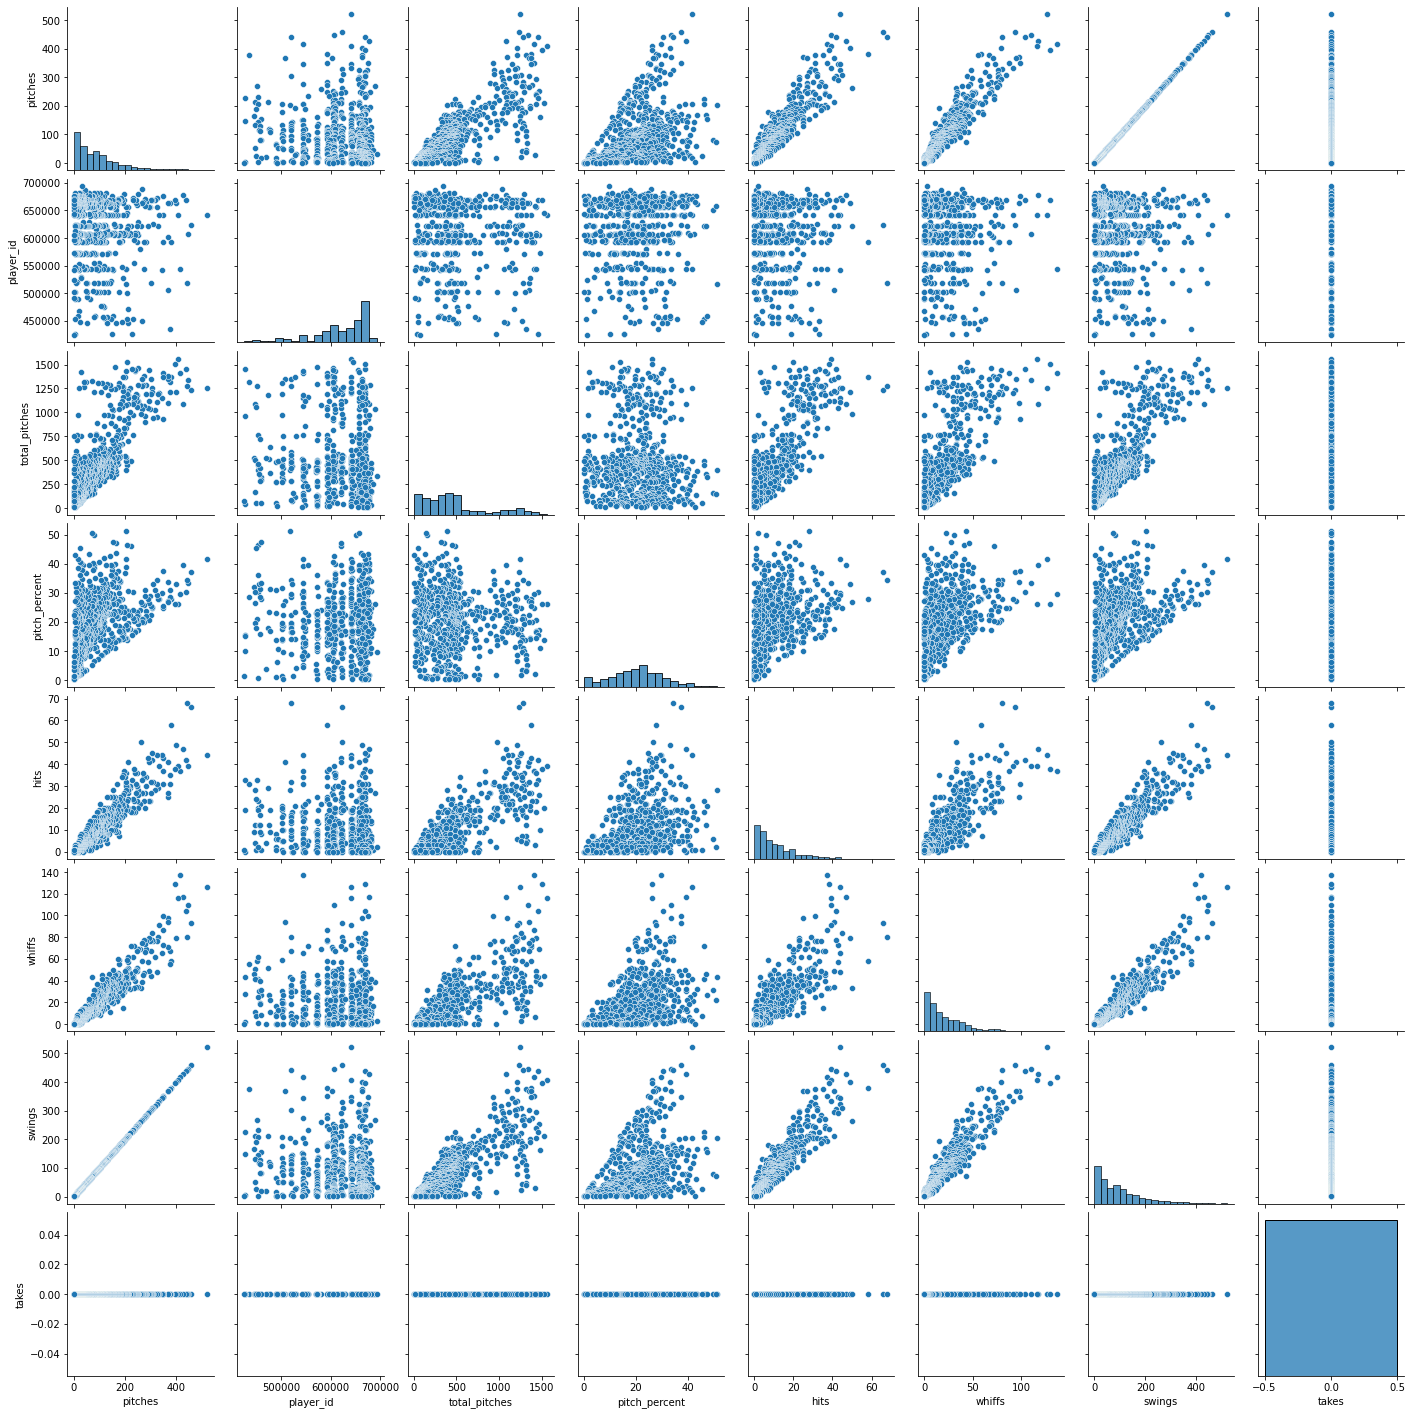

In [21]:
sns.pairplot(fastballs_clean)

# Curveball data has 369 rows to Fastball's 640. That alone shows the difference in prevalence if nothing else. Fastballs tend to be the way to go, anyway.

# Back to line charts, matching hits with whiffs for both sets.

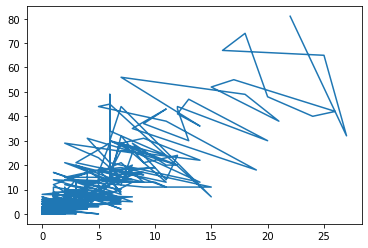

In [22]:
plt.plot('hits', 'whiffs', data=curveballs_clean)
plt.show()

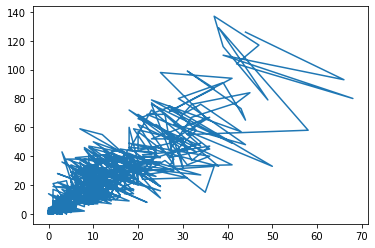

In [23]:
plt.plot('hits', 'whiffs', data=fastballs_clean)
plt.show()

# Okay, time to find a better way to visualize that.

<AxesSubplot:xlabel='whiffs', ylabel='Density'>

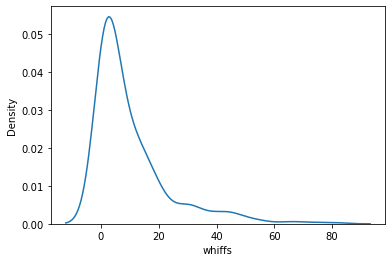

In [24]:
sns.kdeplot(curveballs_clean['whiffs'])

<AxesSubplot:xlabel='whiffs', ylabel='Density'>

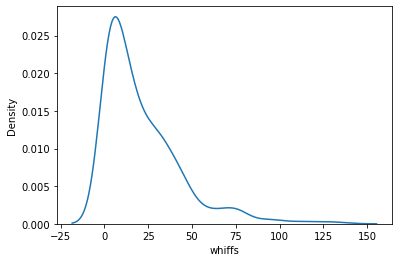

In [25]:
sns.kdeplot(fastballs_clean['whiffs'])

<AxesSubplot:xlabel='hits', ylabel='Density'>

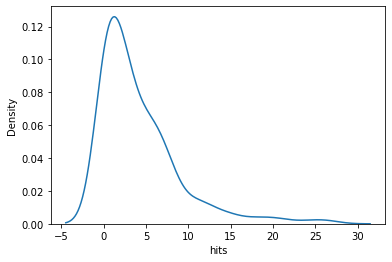

In [26]:
sns.kdeplot(curveballs_clean['hits'])

<AxesSubplot:xlabel='hits', ylabel='Density'>

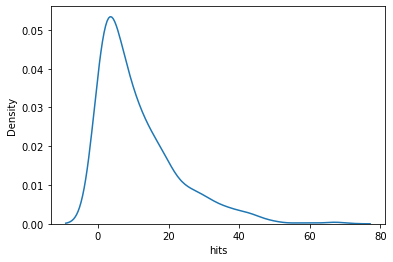

In [27]:
sns.kdeplot(fastballs_clean['hits'])

<AxesSubplot:xlabel='whiffs', ylabel='hits'>

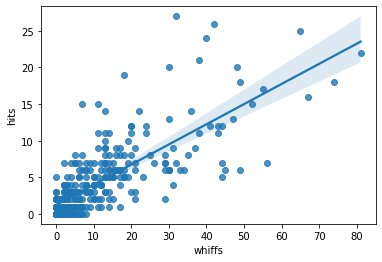

In [28]:
sns.regplot(x=curveballs_clean["whiffs"], y=curveballs_clean["hits"])

<AxesSubplot:xlabel='total_pitches', ylabel='hits'>

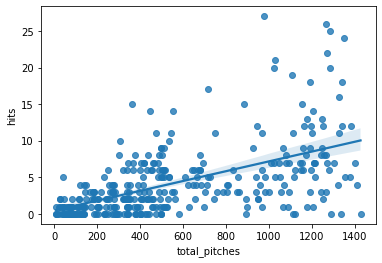

In [29]:
sns.regplot(x=curveballs_clean["total_pitches"], y=curveballs_clean["hits"])

<AxesSubplot:xlabel='total_pitches', ylabel='whiffs'>

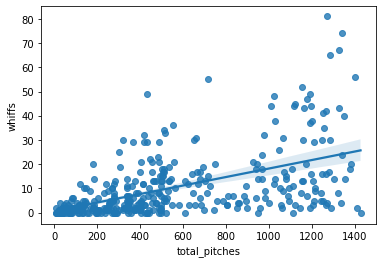

In [30]:
sns.regplot(x=curveballs_clean["total_pitches"], y=curveballs_clean["whiffs"])

# Looking into outliers for Curveballs

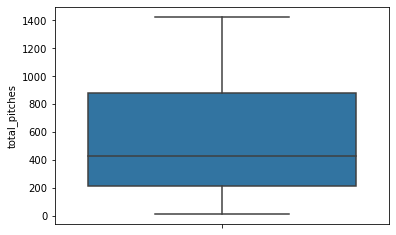

In [31]:
sns.boxplot(y=curveballs_clean["total_pitches"])
plt.show()

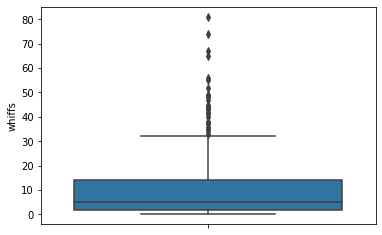

In [32]:
sns.boxplot(y=curveballs_clean["whiffs"])
plt.show()

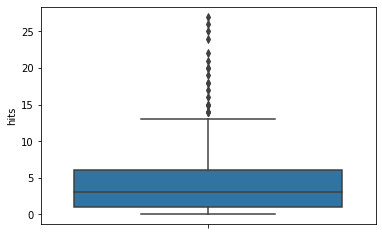

In [33]:
sns.boxplot(y=curveballs_clean["hits"])
plt.show()

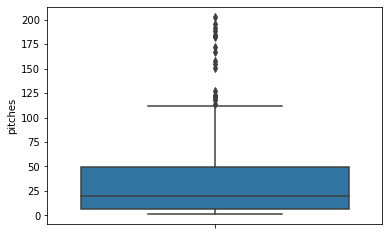

In [34]:
sns.boxplot(y=curveballs_clean["pitches"])
plt.show()

# Outliers for Fastballs

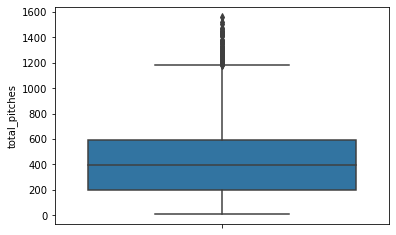

In [35]:
sns.boxplot(y=fastballs_clean["total_pitches"])
plt.show()

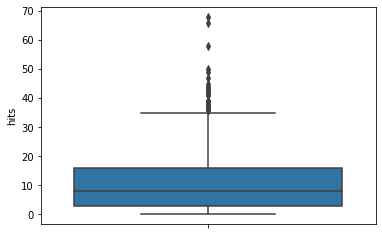

In [36]:
sns.boxplot(y=fastballs_clean["hits"])
plt.show()

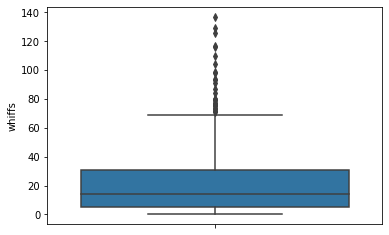

In [37]:
sns.boxplot(y=fastballs_clean["whiffs"])
plt.show()

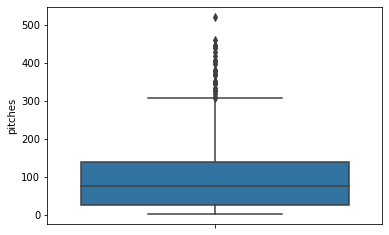

In [38]:
sns.boxplot(y=fastballs_clean["pitches"])
plt.show()

# More outliers in Fastballs overall than in Curveballs, which could be contributed to the bigger size of the dataset.

# Sorting data by pitch percent

In [39]:
curveballs_clean.sort_values('pitch_percent', ascending=False)

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
256,9,572383,"Moran, Brian",25,36.0,1.0,4,9,0
325,3,670102,"Francis, Bowden",9,33.3,1.0,0,3,0
240,11,425877,"Molina, Yadier",40,27.5,5.0,0,11,0
133,31,607755,"Vasquez, Andrew",118,26.3,4.0,12,31,0
125,35,572955,"Johnson, Pierce",138,25.4,4.0,10,35,0
...,...,...,...,...,...,...,...,...,...
366,1,663765,"Woodford, Jake",293,0.3,0.0,0,1,0
362,1,656354,"Davis, Austin",496,0.2,NaN,0,1,0
346,1,669212,"Morgan, Eli",486,0.2,NaN,0,1,0
342,1,669211,"Akin, Keegan",611,0.2,NaN,0,1,0


In [40]:
top_20_curveball=curveballs_clean.sort_values('pitch_percent', ascending=False)[:20]

In [41]:
top_20_curveball

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
256,9,572383,"Moran, Brian",25,36.0,1.0,4,9,0
325,3,670102,"Francis, Bowden",9,33.3,1.0,0,3,0
240,11,425877,"Molina, Yadier",40,27.5,5.0,0,11,0
133,31,607755,"Vasquez, Andrew",118,26.3,4.0,12,31,0
125,35,572955,"Johnson, Pierce",138,25.4,4.0,10,35,0
8,167,592767,"Smyly, Drew",716,23.3,17.0,55,167,0
107,42,669276,"Lee, Dylan",181,23.2,3.0,20,42,0
13,123,519043,"Moore, Matt",552,22.3,14.0,36,123,0
340,2,656008,"Zabala, Aneurys",9,22.2,0.0,2,2,0
53,68,598264,"Barnes, Matt",308,22.1,10.0,19,68,0


In [42]:
fastballs_clean.sort_values('pitch_percent', ascending=False)

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
82,203,517008,"Colomé, Alex",396,51.3,28.0,43,203,0
326,72,657424,"Gage, Matt",142,50.7,2.0,22,72,0
304,80,650671,"Quijada, José",161,49.7,6.0,31,80,0
134,155,459429,"McGee, Jake",326,47.5,21.0,27,155,0
117,167,621363,"Poche, Colin",354,47.2,12.0,46,167,0
...,...,...,...,...,...,...,...,...,...
620,2,663855,"Hicks, Jordan",518,0.4,0.0,0,2,0
628,1,676092,"Snider, Collin",367,0.3,0.0,0,1,0
625,2,502171,"Cobb, Alex",751,0.3,0.0,0,2,0
632,1,642701,"Santana, Dennis",412,0.2,0.0,1,1,0


In [43]:
top_20_fastball=fastballs_clean.sort_values('pitch_percent', ascending=False)[:20]
top_20_fastball

,pitches,player_id,player_name,total_pitches,pitch_percent,hits,whiffs,swings,takes
82,203,517008,"Colomé, Alex",396,51.3,28.0,43,203,0
326,72,657424,"Gage, Matt",142,50.7,2.0,22,72,0
304,80,650671,"Quijada, José",161,49.7,6.0,31,80,0
134,155,459429,"McGee, Jake",326,47.5,21.0,27,155,0
117,167,621363,"Poche, Colin",354,47.2,12.0,46,167,0
76,208,453178,"Kennedy, Ian",449,46.3,23.0,41,208,0
63,225,621345,"Minter, A.J.",487,46.2,18.0,72,225,0
488,25,448281,"Doolittle, Sean",55,45.5,1.0,7,25,0
118,167,661403,"Clase, Emmanuel",383,43.6,15.0,32,167,0
358,60,675921,"Howard, Spencer",139,43.2,10.0,13,60,0
